In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
path = '/Users/jordansahlberg/Desktop/Capstone1/data/data_for_LR.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,SEQN,Age,Gender,Race,Systolic BP,Diastolic BP,Resting HR,Weight,Height,BMI,...,Moderate work activity,Walk or bicycle,Vigorous recreational activity,Moderate recreational activity,Minutes sedentary,Femur BMD,Femoral Neck BMD,Trochanter BMD,LBXCRP,LBX_log
0,41477.0,71.0,1,3.0,144.0,60.0,78.0,83.9,167.1,30.05,...,2,2.0,2,2,240.0,1.001,0.901,0.723,0.07,-2.659260
1,41479.0,52.0,1,1.0,112.0,70.0,62.0,65.7,154.4,27.56,...,1,1.0,2,2,180.0,0.907,0.825,0.657,0.02,-3.912023
2,41482.0,64.0,1,1.0,116.0,78.0,76.0,101.6,173.8,33.64,...,2,2.0,2,1,180.0,0.972,0.791,0.718,0.40,-0.916291
3,41485.0,30.0,2,2.0,108.0,44.0,68.0,64.8,157.9,25.99,...,1,2.0,2,1,120.0,1.026,0.891,0.780,0.14,-1.966113
4,41486.0,61.0,2,1.0,126.0,64.0,62.0,86.2,166.2,31.21,...,2,2.0,2,2,480.0,0.942,0.820,0.722,0.39,-0.941609


In [220]:
df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'Systolic BP', 'Diastolic BP',
       'Resting HR', 'Weight', 'Height', 'BMI', 'Waist Circumference',
       'Tricep Skinfold', 'Subscap Skinfold', 'Vigorous work activity',
       'Moderate work activity', 'Walk or bicycle',
       'Vigorous recreational activity', 'Moderate recreational activity',
       'Minutes sedentary', 'Femur BMD', 'Femoral Neck BMD', 'Trochanter BMD',
       'LBXCRP', 'LBX_log'],
      dtype='object')

In [221]:
df['Vigorous recreational activity'] = df['Vigorous recreational activity'].astype('category')
df['Moderate recreational activity'] = df['Moderate recreational activity'].astype('category')
df['Walk or bicycle'] = df['Walk or bicycle'].astype('category')

In [222]:
np.sqrt(4423)

66.50563885867122

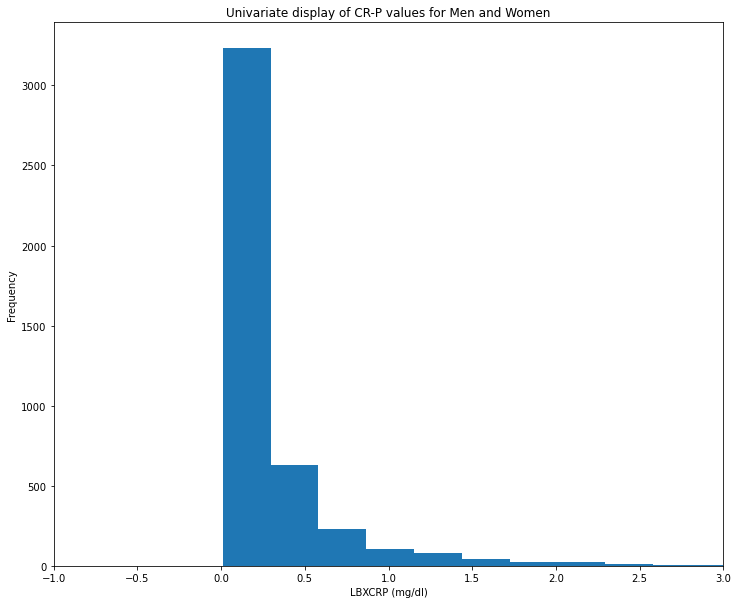

In [223]:
plt.figure(figsize=(12,10))

plt.hist(df['LBXCRP'], bins=70)
plt.xlim(-1, 3)
plt.title('Univariate display of CR-P values for Men and Women')
plt.xlabel('LBXCRP (mg/dl)')
plt.ylabel('Frequency')
plt.show()

In [224]:
Low_CI = df.LBX_log.quantile(.025)
High_CI = df.LBX_log.quantile(.975)

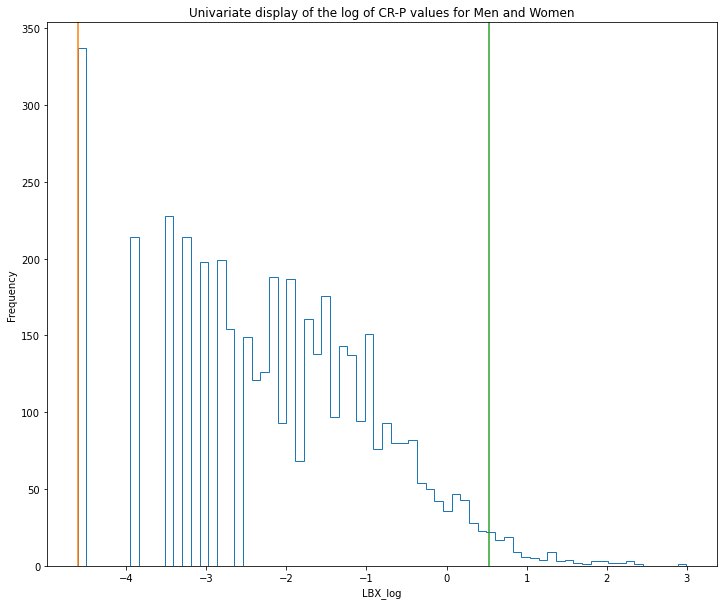

In [225]:
plt.figure(figsize=(12,10))

plt.hist(df['LBX_log'], bins=70, histtype='step')
plt.title('Univariate display of the log of CR-P values for Men and Women')
plt.xlabel('LBX_log')
plt.ylabel('Frequency')

plt.axvline(Low_CI, color='C1')
plt.axvline(High_CI, color='C2')

plt.show()

Text(0.5, 1.0, 'Historgram of target')

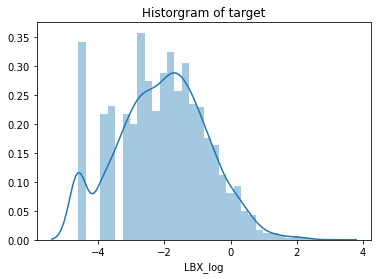

In [226]:
sns.distplot(df['LBX_log'])
plt.title('Historgram of target')

In [227]:
def heatmap(df):
    corr = df.corr(method='spearman')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
    fig.suptitle('Correlation matrix of features', fontsize=15)
    
    return fig.tight_layout()

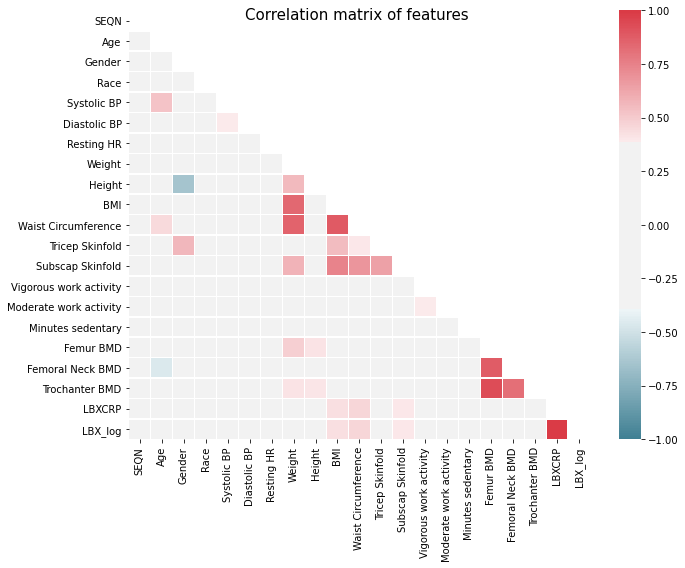

In [228]:
heatmap(df)

Text(0.5, 1.0, 'Bivariate comparison of LBXCRP against Weight, Height and Waist Circumference')

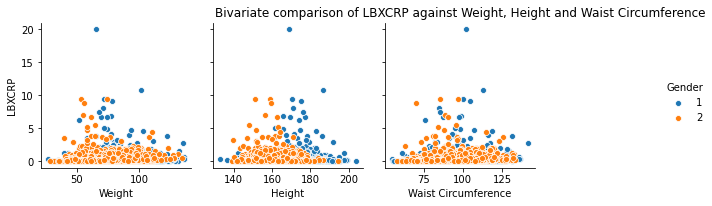

In [229]:
sns.pairplot(x_vars=['Weight', 'Height', 'Waist Circumference'], y_vars=['LBXCRP'], data=df, hue='Gender')
plt.title('Bivariate comparison of LBXCRP against Weight, Height and Waist Circumference')

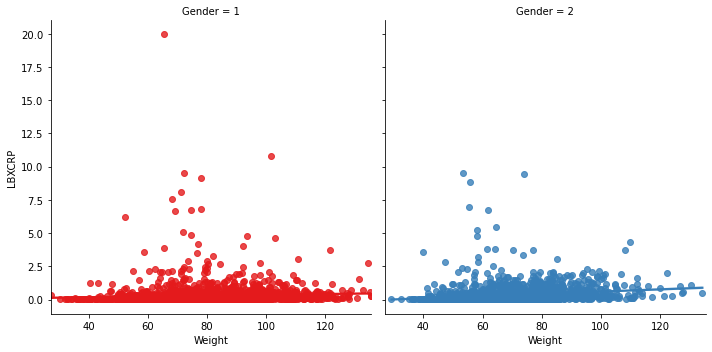

In [230]:
sns.lmplot(x='Weight', y='LBXCRP', data=df, hue='Gender', col='Gender', palette = 'Set1')


In [231]:
df[df['Gender'] == 1].LBXCRP

0       0.07
1       0.02
2       0.40
5       0.05
8       0.07
        ... 
4415    0.12
4416    0.26
4418    0.04
4419    0.04
4421    0.02
Name: LBXCRP, Length: 2333, dtype: float64

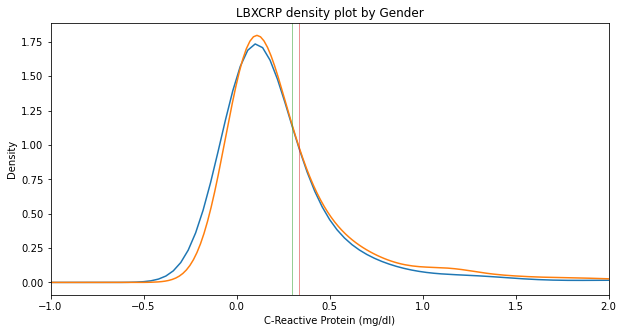

In [232]:
plt.figure(figsize=(10,5))

df[df['Gender']==1].LBXCRP.plot(kind='density')
df[df['Gender']==2].LBXCRP.plot(kind='density')
plt.xlim(-1,2)

plt.axvline(df[df['Gender']==1].LBXCRP.mean(), color='C2', linewidth=.5)
plt.axvline(df[df['Gender']==2].LBXCRP.mean(), color='C3', linewidth=.5)

plt.title('LBXCRP density plot by Gender')
plt.xlabel('C-Reactive Protein (mg/dl)')

plt.show()

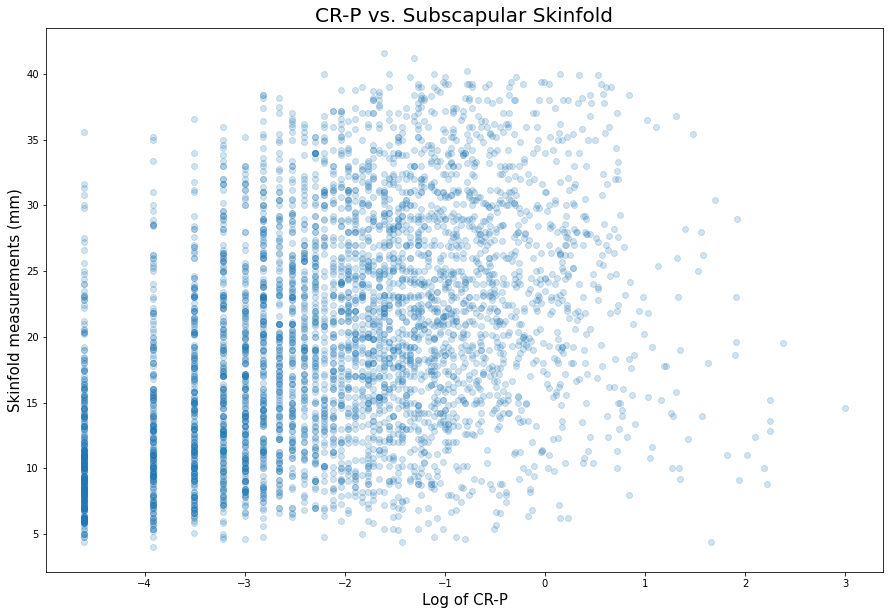

In [233]:
plt.figure(figsize=(15,10))
plt.scatter(df.LBX_log, df['Subscap Skinfold'], alpha=.2)
plt.title('CR-P vs. Subscapular Skinfold', fontsize=20)
plt.xlabel('Log of CR-P', fontsize=15)
plt.ylabel('Skinfold measurements (mm)', fontsize=15)
plt.show()

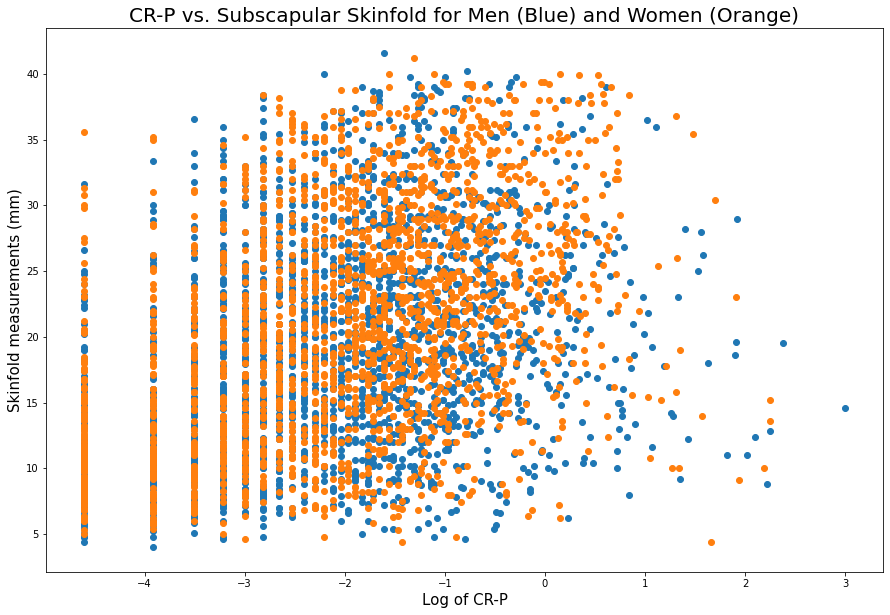

In [235]:
plt.figure(figsize=(15,10))
plt.scatter(df[df['Gender']==1].LBX_log, df[df['Gender']==1]['Subscap Skinfold'])
plt.scatter(df[df['Gender']==2].LBX_log, df[df['Gender']==2]['Subscap Skinfold'])
plt.title('CR-P vs. Subscapular Skinfold for Men (Blue) and Women (Orange)', fontsize=20)
plt.xlabel('Log of CR-P', fontsize=15)
plt.ylabel('Skinfold measurements (mm)', fontsize=15)
plt.show()

In [236]:
print('The mean CR-P for Men is: ', df[df['Gender']==1].LBX_log.mean())
print('The mean CR-P for Women is: ', df[df['Gender']==2].LBX_log.mean())

The mean CR-P for Men is:  -2.157513286455413
The mean CR-P for Women is:  -1.9597156136273564


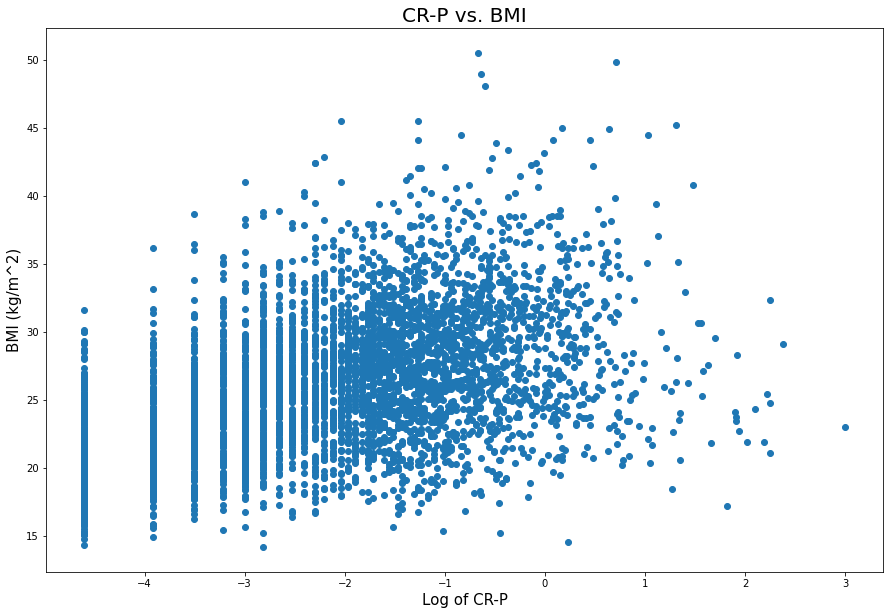

In [237]:
plt.figure(figsize=(15,10))
plt.scatter(df.LBX_log, df['BMI'])
plt.title('CR-P vs. BMI', fontsize=20)
plt.xlabel('Log of CR-P', fontsize=15)
plt.ylabel('BMI (kg/m^2)', fontsize=15)
plt.show()

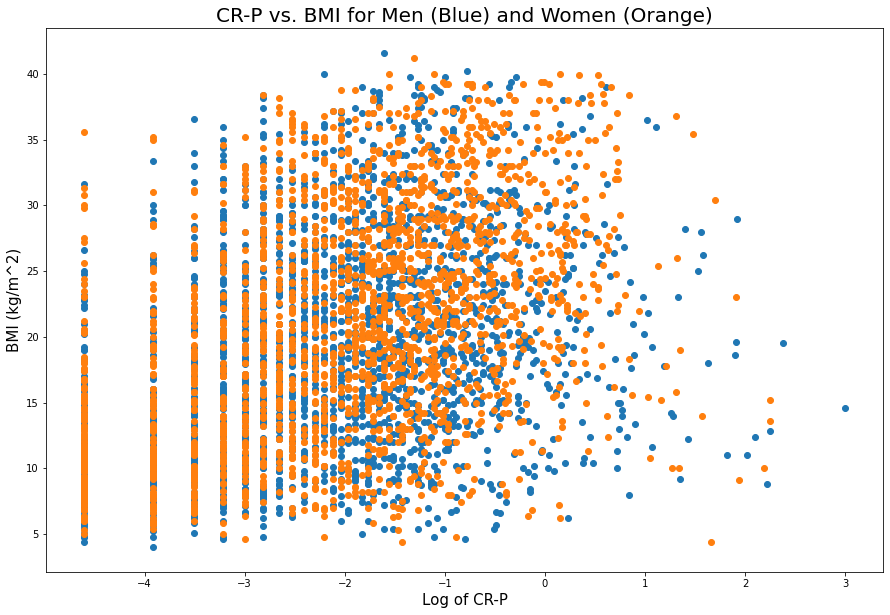

In [238]:
plt.figure(figsize=(15,10))
plt.scatter(df[df['Gender']==1].LBX_log, df[df['Gender']==1]['Subscap Skinfold'])
plt.scatter(df[df['Gender']==2].LBX_log, df[df['Gender']==2]['Subscap Skinfold'])

plt.title('CR-P vs. BMI for Men (Blue) and Women (Orange)', fontsize=20)
plt.xlabel('Log of CR-P', fontsize=15)
plt.ylabel('BMI (kg/m^2)', fontsize=15)

plt.show()


In [239]:
print('The mean BMI for Men is: ', df[df['Gender']==1].BMI.mean())
print('The mean BMI for Women is: ', df[df['Gender']==2].BMI.mean())

The mean BMI for Men is:  26.35581225889417
The mean BMI for Women is:  26.308913875598073


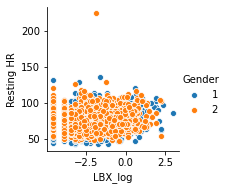

In [241]:
sns.pairplot(x_vars=['LBX_log'], y_vars=['Resting HR'], data=df, hue='Gender')

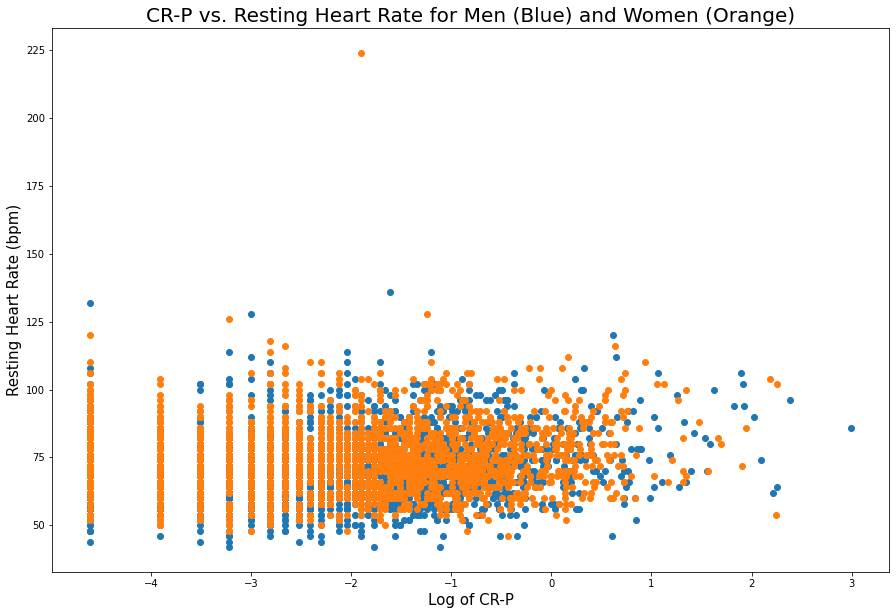

In [243]:
plt.figure(figsize=(15,10))
plt.scatter(df[df['Gender']==1].LBX_log, df[df['Gender']==1]['Resting HR'])
plt.scatter(df[df['Gender']==2].LBX_log, df[df['Gender']==2]['Resting HR'])

plt.title('CR-P vs. Resting Heart Rate for Men (Blue) and Women (Orange)', fontsize=20)
plt.xlabel('Log of CR-P', fontsize=15)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=15)

plt.show()

In [21]:
df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'Systolic BP', 'Diastolic BP',
       'Resting HR', 'Weight', 'Height', 'BMI', 'Waist Circumference',
       'Tricep Skinfold', 'Subscap Skinfold', 'Vigorous work activity',
       'Moderate work activity', 'Walk or bicycle',
       'Vigorous recreational activity', 'Moderate recreational activity',
       'Minutes sedentary', 'Femur BMD', 'Femoral Neck BMD', 'Trochanter BMD',
       'LBXCRP', 'LBX_log'],
      dtype='object')

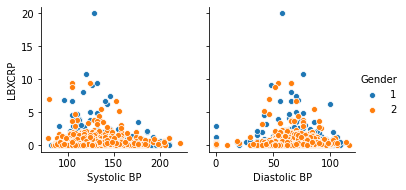

In [22]:
sns.pairplot(x_vars=['Systolic BP', 'Diastolic BP'], y_vars=['LBXCRP'], data=df, hue='Gender')

In [23]:
from scipy import stats

In [24]:
def dist_from_mean(column):
    
    temp_col = df[column].apply(lambda x: (x - df[column].mean())**2)
    plt.scatter(temp_col, df['LBX_log'])
    
    print(column + ": ", stats.pearsonr(temp_col.values, df['LBX_log'].values))
    

SEQN:  (-0.0012087329871518513, 0.9359470683245732)
Age:  (-0.10455377057576432, 3.156795312056605e-12)
Gender:  (0.07314364898563713, 1.1181669886356978e-06)
Race:  (-0.03496892563433021, 0.02003538033693795)
Systolic BP:  (0.05763596385141491, 0.00012545124874838162)
Diastolic BP:  (0.02784651139923009, 0.06405660965391133)
Resting HR:  (0.015582500286484275, 0.30015823539498176)
Weight:  (0.012982882525183858, 0.3880125482141445)
Height:  (-0.010407857838168978, 0.4889346095038911)
BMI:  (0.06572347987324442, 1.2172418837031135e-05)
Waist Circumference:  (-0.0397125720894008, 0.008256286099951798)
Tricep Skinfold:  (0.12154925803786017, 4.999156772948881e-16)
Subscap Skinfold:  (-0.00010195239704873546, 0.9945915866381662)
Vigorous work activity:  (-0.022711654964337538, 0.1309870480251123)
Moderate work activity:  (-0.046247765931694676, 0.0020943648549838225)
Walk or bicycle:  (-0.1096209331966596, 2.6636966913321123e-13)
Vigorous recreational activity:  (-0.04760709484304772, 0.0

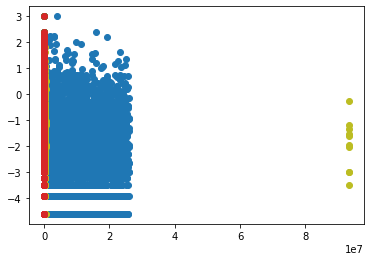

In [25]:
for name in df.columns:
    dist_from_mean(name)

In [26]:
for name in df.columns:
    
    print(name + ": ", stats.pearsonr(df[name].values, df.LBX_log))
    

SEQN:  (-0.002002009870720359, 0.8941084069927486)
Age:  (0.33945748655432634, 1.0344036985623961e-119)
Gender:  (0.07314364898563712, 1.1181669886359562e-06)
Race:  (-0.0371211092366886, 0.013552296124441914)
Systolic BP:  (0.18999097736170412, 3.1911391412047482e-37)
Diastolic BP:  (0.12205058424677204, 3.7857810987686885e-16)
Resting HR:  (0.11806751614471166, 3.3399049884816194e-15)
Weight:  (0.3296221880761605, 1.3841645414686553e-112)
Height:  (-0.04663453098090362, 0.001920424296658367)
BMI:  (0.4356062493036197, 2.7460431952047622e-204)
Waist Circumference:  (0.468374417573904, 4.4953112123299624e-240)
Tricep Skinfold:  (0.3349669031706574, 1.999596051897628e-116)
Subscap Skinfold:  (0.39659865158330726, 1.553337644716855e-166)
Vigorous work activity:  (0.022711654964337538, 0.1309870480251123)
Moderate work activity:  (0.04624776593169466, 0.0020943648549838225)
Walk or bicycle:  (0.10962093319665958, 2.6636966913321123e-13)
Vigorous recreational activity:  (0.2130301210434307

In [129]:
df['age_by_decade'] = pd.cut(x=df.Age, bins=[0,12, 19, 29, 39, 49, 59 , 69 , 79, 89], labels=["1-12", "12-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"])

In [131]:
df.groupby('age_by_decade').LBX_log.describe()

,count,mean,std,min,25%,50%,75%,max
age_by_decade,,,,,,,,
1-12,94.0,-3.189547,1.331825,-4.60517,-4.605170,-3.506558,-2.231102,0.019803
12-19,738.0,-3.051898,1.355930,-4.60517,-4.605170,-3.218876,-2.120264,2.182675
20-29,574.0,-2.183418,1.292523,-4.60517,-2.995732,-2.120264,-1.272966,2.095561
30-39,597.0,-2.036388,1.226983,-4.60517,-2.813411,-1.966113,-1.237874,1.627278
40-49,600.0,-1.842812,1.193757,-4.60517,-2.659260,-1.832581,-1.049822,2.379546
50-59,543.0,-1.764193,1.213137,-4.60517,-2.659260,-1.714798,-0.967584,1.906575
60-69,605.0,-1.598774,1.185373,-4.60517,-2.407946,-1.609438,-0.867501,2.250239
70-79,446.0,-1.643800,1.167460,-4.60517,-2.525729,-1.714798,-0.873525,2.995732
80+,226.0,-1.522669,1.297508,-4.60517,-2.496283,-1.386294,-0.744609,2.243896


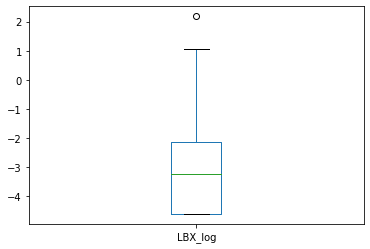

In [58]:
df[df['age_by_decade']=='teens']['LBX_log'].plot.box()

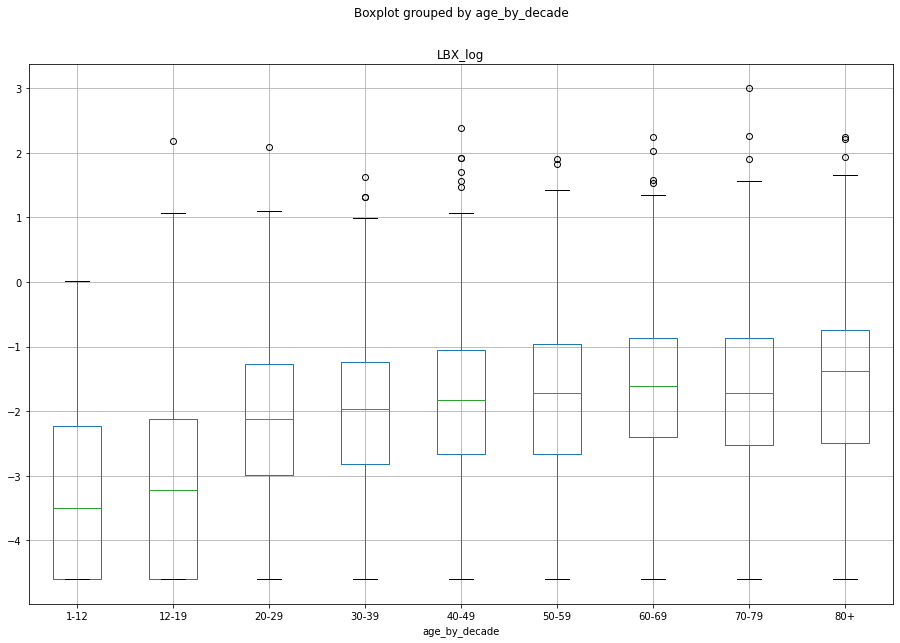

In [126]:
df.boxplot(by ='age_by_decade', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [132]:
df.groupby('age_by_decade').LBX_log.describe()

,count,mean,std,min,25%,50%,75%,max
age_by_decade,,,,,,,,
1-12,94.0,-3.189547,1.331825,-4.60517,-4.605170,-3.506558,-2.231102,0.019803
12-19,738.0,-3.051898,1.355930,-4.60517,-4.605170,-3.218876,-2.120264,2.182675
20-29,574.0,-2.183418,1.292523,-4.60517,-2.995732,-2.120264,-1.272966,2.095561
30-39,597.0,-2.036388,1.226983,-4.60517,-2.813411,-1.966113,-1.237874,1.627278
40-49,600.0,-1.842812,1.193757,-4.60517,-2.659260,-1.832581,-1.049822,2.379546
50-59,543.0,-1.764193,1.213137,-4.60517,-2.659260,-1.714798,-0.967584,1.906575
60-69,605.0,-1.598774,1.185373,-4.60517,-2.407946,-1.609438,-0.867501,2.250239
70-79,446.0,-1.643800,1.167460,-4.60517,-2.525729,-1.714798,-0.873525,2.995732
80+,226.0,-1.522669,1.297508,-4.60517,-2.496283,-1.386294,-0.744609,2.243896


In [135]:
df['BMI_categories'] = pd.cut(df.BMI, bins=[0, 18.5, 25, 30, 35, 40, 45], 
                              labels = ['Underweight (<18.5)', 'Normal (18-24.9)', 'Overweight (25-29.9)', 'Obese, class 1 (30-34.9)', 'Obese, class 2 (35-39.9)', 'Obese, class 3 (>40)'])

In [136]:
df.groupby('BMI_categories').BMI.describe()

,count,mean,std,min,25%,50%,75%,max
BMI_categories,,,,,,,,
Underweight (<18.5),190.0,17.352316,1.032937,14.20,16.755,17.745,18.1275,18.50
Normal (18-24.9),1656.0,22.223068,1.762769,18.51,20.820,22.405,23.7500,25.00
Overweight (25-29.9),1628.0,27.376474,1.434098,25.01,26.140,27.325,28.5800,30.00
"Obese, class 1 (30-34.9)",719.0,32.058387,1.375632,30.01,30.935,31.840,33.1500,34.99
"Obese, class 2 (35-39.9)",187.0,36.920802,1.305240,35.05,35.745,36.660,37.8850,39.98
"Obese, class 3 (>40)",36.0,42.191389,1.473521,40.03,40.970,42.085,43.1950,45.00


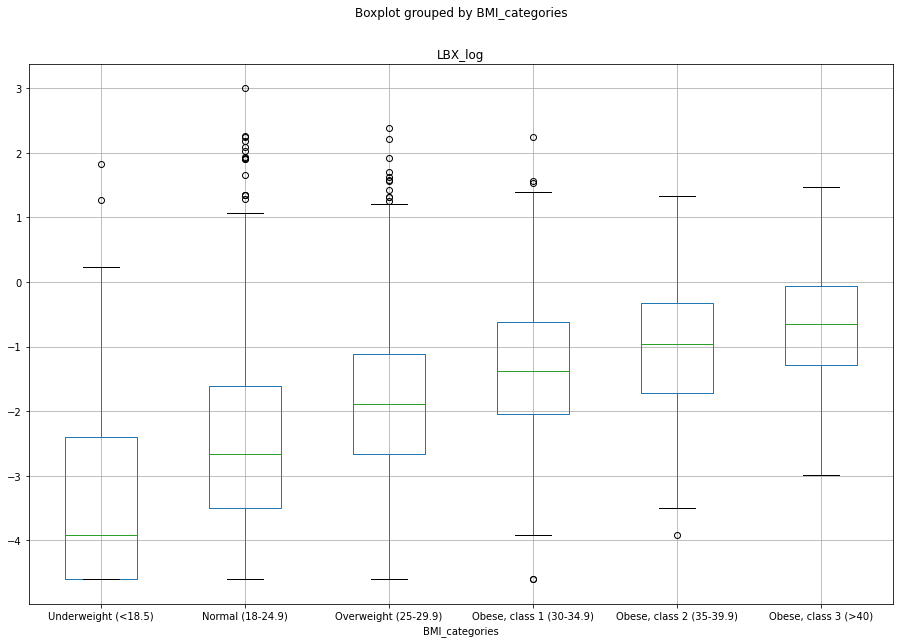

In [150]:
df.boxplot(by ='BMI_categories', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [133]:
df.groupby(['BMI_categories']).LBXCRP.describe()

,count,mean,std,min,25%,50%,75%,max
BMI_categories,,,,,,,,
Underweight,190.0,0.135947,0.531218,0.01,0.010,0.02,0.0900,6.19
Normal,1656.0,0.251051,0.844772,0.01,0.030,0.07,0.2000,20.00
Overweight,1628.0,0.304036,0.600688,0.01,0.070,0.15,0.3300,10.80
Obese (class 1),719.0,0.434465,0.599038,0.01,0.130,0.25,0.5350,9.43
Obese (class 2),187.0,0.593797,0.623504,0.02,0.180,0.38,0.7200,3.77
Obese (class 3),36.0,0.767500,0.850490,0.05,0.275,0.52,0.9325,4.37


In [137]:
df.Weight.describe()

count    4423.000000
mean       74.119218
std        16.943354
min        27.100000
25%        61.800000
50%        72.700000
75%        84.900000
max       135.400000
Name: Weight, dtype: float64

In [147]:
df['Weight_categories'] = pd.cut(df.Weight, bins=[25, 50, 75, 100, 125, 150], 
                                labels=['25-50 kg', '50-75 kg', '75-100 kg', '100-125 kg', '125-150 kg'])

In [148]:
df.groupby('Weight_categories').Weight.describe()

,count,mean,std,min,25%,50%,75%,max
Weight_categories,,,,,,,,
25-50 kg,272.0,45.031985,4.378711,27.1,42.775,46.20,48.3,50.0
50-75 kg,2169.0,63.970493,6.790406,50.1,58.400,64.60,69.7,75.0
75-100 kg,1661.0,85.261409,6.827833,75.1,79.400,84.30,90.5,100.0
100-125 kg,299.0,108.218060,6.192500,100.1,102.850,106.80,112.2,124.2
125-150 kg,22.0,129.645455,3.463652,125.4,127.350,127.95,132.4,135.4


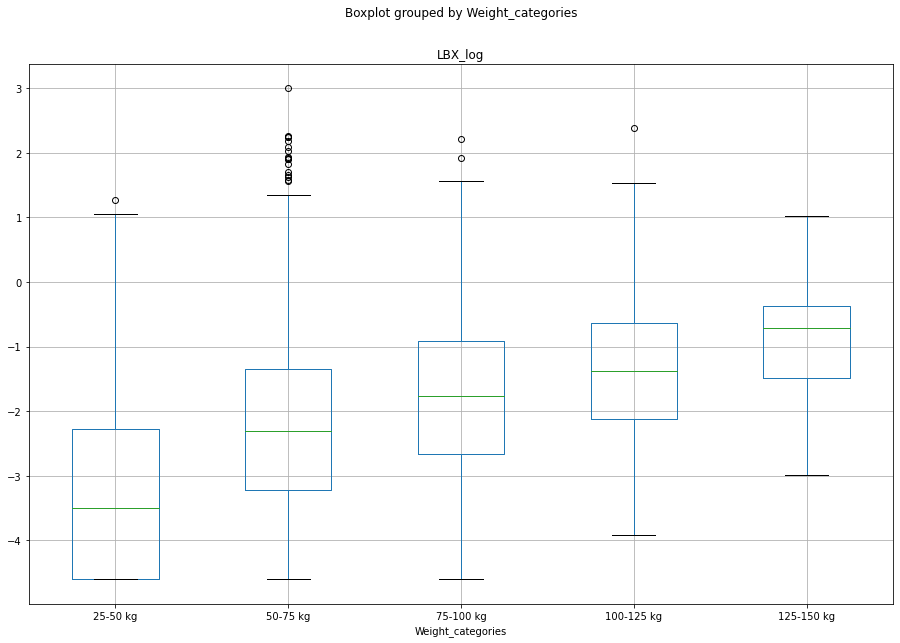

In [149]:
df.boxplot(by ='Weight_categories', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [153]:
df['Tricep Skinfold'].describe()

count    4423.000000
mean       17.502193
std         7.870257
min         3.000000
25%        11.200000
50%        16.200000
75%        23.000000
max        40.600000
Name: Tricep Skinfold, dtype: float64

In [164]:
df['Tricep_skinfold_category'] = pd.cut(df['Tricep Skinfold'], bins=[0, 10, 20, 30, 40, 50], 
                                  labels=['0-10 mm', '10-20 mm', '20-30 mm', '30-40 mm', '40+ mm'])

In [165]:
df.groupby('Tricep_skinfold_category')['Tricep Skinfold'].describe()

,count,mean,std,min,25%,50%,75%,max
Tricep_skinfold_category,,,,,,,,
0-10 mm,863.0,7.817265,1.604168,3.0,6.800,8.0,9.10,10.0
10-20 mm,2028.0,14.796105,2.837877,10.1,12.200,14.6,17.00,20.0
20-30 mm,1186.0,24.466189,2.851949,20.1,22.000,24.4,26.80,30.0
30-40 mm,342.0,33.570468,2.431870,30.1,31.525,33.2,35.20,40.0
40+ mm,4.0,40.350000,0.191485,40.2,40.200,40.3,40.45,40.6


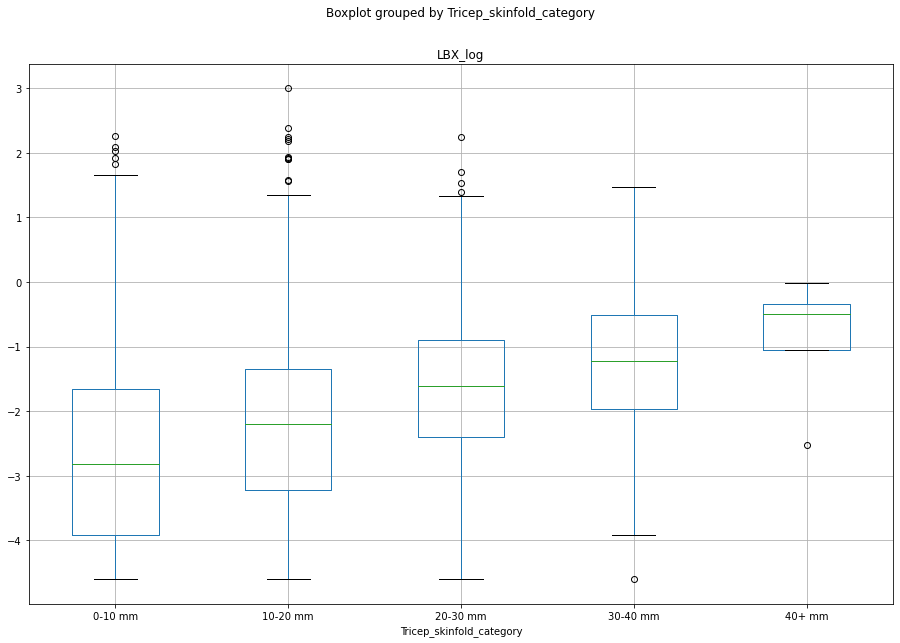

In [166]:
df.boxplot(by ='Tricep_skinfold_category', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [167]:
df['Subscap_skinfold_category'] = pd.cut(df['Subscap Skinfold'], bins=[0, 10, 20, 30, 40, 50], 
                                  labels=['0-10 mm', '10-20 mm', '20-30 mm', '30-40 mm', '40+ mm'])

In [169]:
df.groupby('Subscap_skinfold_category')['Subscap Skinfold'].describe()

,count,mean,std,min,25%,50%,75%,max
Subscap_skinfold_category,,,,,,,,
0-10 mm,610.0,8.014426,1.407587,4.0,7.0,8.2,9.2,10.0
10-20 mm,1730.0,15.151040,2.893129,10.1,12.8,15.2,17.8,20.0
20-30 mm,1461.0,24.655031,2.850118,20.1,22.2,24.4,27.0,30.0
30-40 mm,619.0,33.945396,2.693338,30.1,31.6,33.5,36.0,40.0
40+ mm,3.0,41.000000,0.721110,40.2,40.7,41.2,41.4,41.6


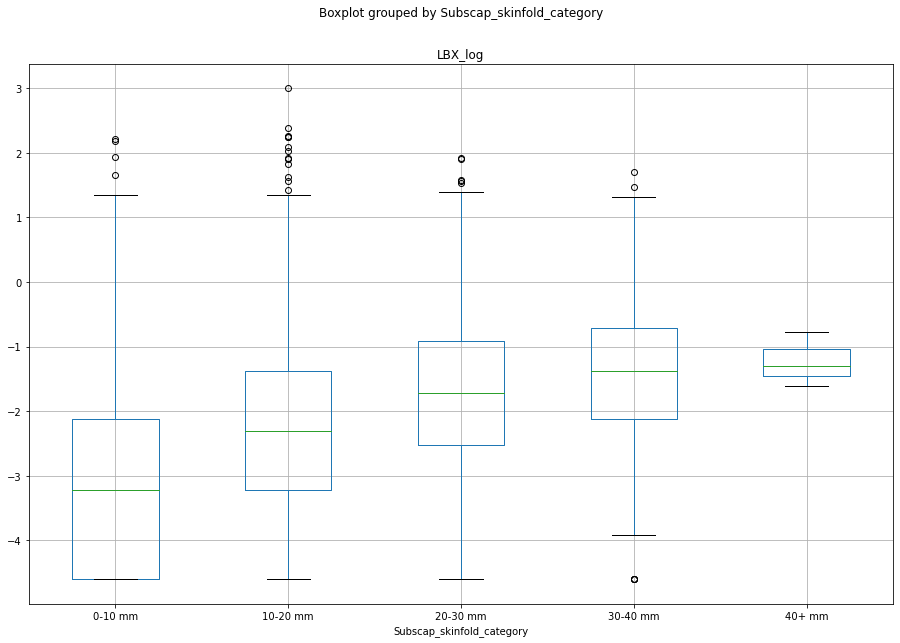

In [170]:
df.boxplot(by ='Subscap_skinfold_category', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [196]:
#Vigorous Recreational activity (10 minutes continuous)? PAQ665 - Moderate recreational activity
df['Vigorous recreational activity category'] = pd.cut(df['Vigorous recreational activity'], bins=[0,1,2],
                                                      labels=['Yes to 10-minutes continuous PA', 'No to 10-minutes continuous PA'])


In [198]:
df.groupby('Vigorous recreational activity category').LBX_log.describe()

,count,mean,std,min,25%,50%,75%,max
Vigorous recreational activity category,,,,,,,,
Yes to 10-minutes continuous PA,1342.0,-2.511555,1.347626,-4.60517,-3.506558,-2.525729,-1.560648,2.250239
No to 10-minutes continuous PA,3080.0,-1.869094,1.304627,-4.60517,-2.813411,-1.832581,-0.967584,2.995732


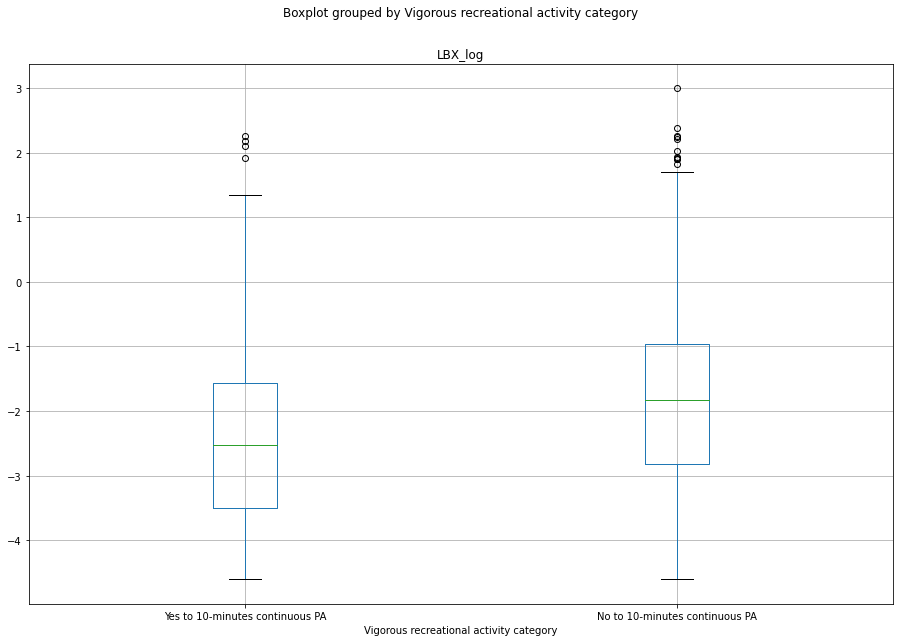

In [199]:
df.boxplot(by ='Vigorous recreational activity category', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [204]:
df['Moderate recreational activity']

0       2
1       2
2       1
3       1
4       2
       ..
4418    2
4419    2
4420    2
4421    1
4422    2
Name: Moderate recreational activity, Length: 4423, dtype: category
Categories (2, int64): [1, 2]

In [205]:
df['Moderate recreational activity category'] = pd.cut(df['Moderate recreational activity'], bins=[0,1,2],
                                                      labels=['Yes to 10-minutes continuous PA', 'No to 10-minutes continuous PA'])


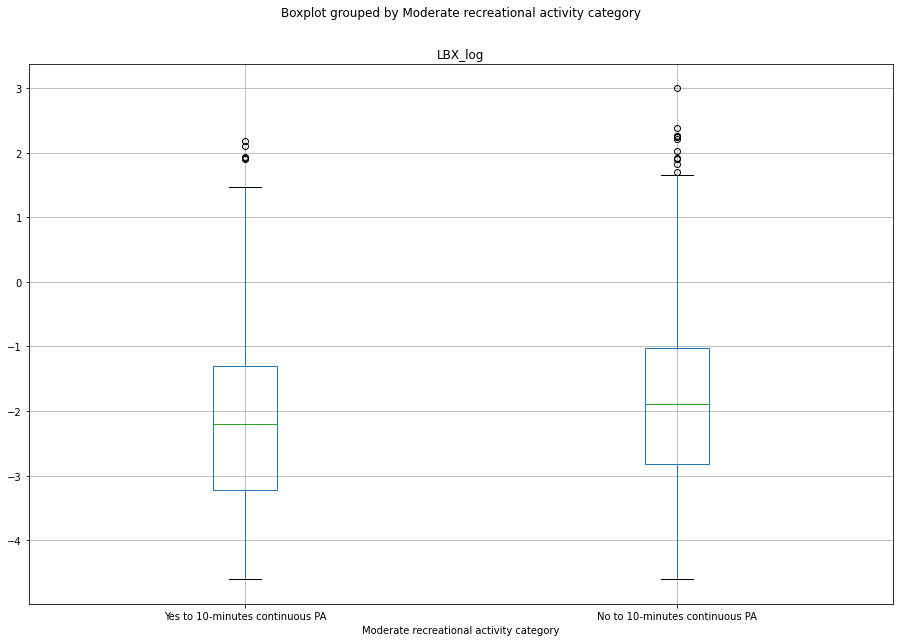

In [206]:
df.boxplot(by ='Moderate recreational activity category', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()

In [210]:
df['Walk or bicycle category'] = pd.cut(df['Walk or bicycle'], bins=[0,1,2],
                                       labels=['YES, 10-minutes a day', 'NO'])

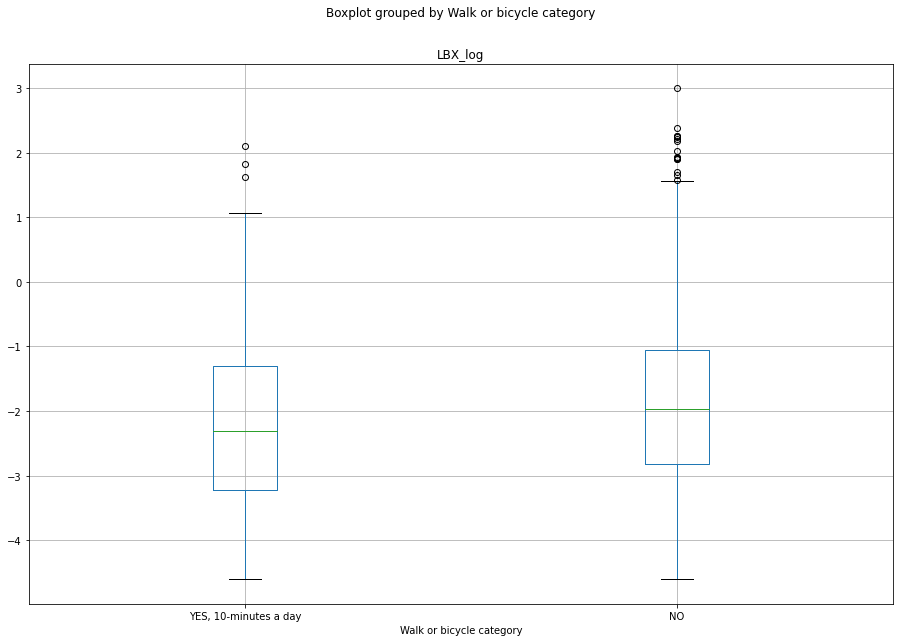

In [217]:
df.boxplot(by ='Walk or bicycle category', column =['LBX_log'], grid = True, figsize=(15,10))
plt.show()